In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import torch
torch.manual_seed(42)
torch.cuda.manual_seed_all(42)
np.set_printoptions(suppress=True)

import os
import scanpy as sc
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

from scipy.sparse import load_npz

### Create & Filter clonal info

In [2]:
clones = load_npz('./clone_meta.npz').todense()
clones = pd.DataFrame(data=clones, index=[str(i) for i in range(clones.shape[0])])
clones.shape

(130887, 5864)

In [3]:
adata = sc.read_h5ad('./klein_paga.h5ad')

In [4]:
clones = clones.loc[adata.obs.index]
clones.shape

(126861, 5864)

In [5]:
temp = []
for i in list(adata.obs.index):
    try:
        temp.append('clone_' + str(np.array(clones.loc[i]).nonzero()[0][0]))
    except:
        temp.append('nan')
adata.obs['clone'] = temp

In [6]:
adata.obs['pop_time'] = [adata.obs['label_man'][i] + '_Day' + str(int(adata.obs['Time_point'][i])) for i in list(adata.obs.index)]

In [7]:
adata.obs

Time_point Population  Annotation  Well time_cat leiden  \
0              6.0         LK      undiff     2      6.0     16   
1              6.0         LK      undiff     2      6.0     10   
2              6.0         LK    Monocyte     2      6.0      3   
3              6.0         LK  Neutrophil     2      6.0     12   
4              6.0         LK      undiff     2      6.0      9   
...            ...        ...         ...   ...      ...    ...   
130882         6.0        LSK      undiff     1      6.0     10   
130883         6.0        LSK      undiff     1      6.0      0   
130884         6.0        LSK    Monocyte     1      6.0      2   
130885         6.0        LSK    Monocyte     1      6.0      2   
130886         6.0        LSK      undiff     1      6.0     15   

                 comb               label_man       clone  \
0           undiff_16                  prog_2   clone_573   
1           undiff_10  prog_Baso_Meg_Ery_Mast  clone_1440   
2          Monocyte_3               prog_Mono   clone_394   
3       Neutrophil_12          early_prog_Neu         nan   
4            undiff_9            prog_Meg_Ery  clone_1972   
...               ...                     ...         ...   
130882      undiff_10  prog_Baso_Meg_Ery_Mast         nan   
130883       undiff_0                  prog_2  clone_1374   
130884     Monocyte_2                    Mono         nan   
130885     Monocyte_2                    Mono         nan   
130886      undiff_15                  prog_1         nan   

                           pop_time  
0                       prog_2_Day6  
1       prog_Baso_Meg_Ery_Mast_Day6  
2                    prog_Mono_Day6  
3               early_prog_Neu_Day6  
4                 prog_Meg_Ery_Day6  
...                             ...  
130882  prog_Baso_Meg_Ery_Mast_Day6  
130883                  prog_2_Day6  
130884                    Mono_Day6  
130885                    Mono_Day6  
130886                  prog_1_Day6  

[126861 rows x 10 columns]

In [8]:
adata_clones = adata[adata.obs['clone'] != 'nan', :]
adata_clones

View of AnnData object with n_obs × n_vars = 47979 × 5000
    obs: 'Time_point', 'Population', 'Annotation', 'Well', 'time_cat', 'leiden', 'comb', 'label_man', 'clone', 'pop_time'
    var: 'symbol', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Annotation_colors', 'comb_colors', 'hvg', 'label_man_colors', 'label_man_sizes', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'paga', 'pca', 'time_cat_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [9]:
from natsort import natsorted
clone_index = list(set(adata_clones.obs['clone'].values))
columns = list(set(adata_clones.obs['pop_time'].values))
mat = pd.DataFrame(index=natsorted(clone_index), columns=natsorted(columns), data=0.0)

In [10]:
for idx, row in adata_clones.obs.iterrows():
    mat.at[row['clone'], row['pop_time']] += 1

In [11]:
mat

Baso_Day2  Baso_Day4  Baso_Day6  DC_Day2  DC_Day4  DC_Day6  \
clone_0           0.0        0.0        0.0      0.0      0.0      0.0   
clone_1           0.0        0.0        0.0      0.0      0.0      0.0   
clone_2           0.0        0.0        0.0      0.0      0.0      0.0   
clone_3           0.0        0.0        0.0      0.0      0.0      0.0   
clone_4           0.0        2.0        6.0      0.0      0.0      0.0   
...               ...        ...        ...      ...      ...      ...   
clone_5859        0.0        0.0        0.0      0.0      0.0      0.0   
clone_5860        0.0        1.0        0.0      0.0      0.0      0.0   
clone_5861        0.0        0.0        0.0      0.0      0.0      0.0   
clone_5862        0.0        0.0        0.0      0.0      0.0      0.0   
clone_5863        0.0        0.0        0.0      0.0      0.0      0.0   

            Eos_Day4  Eos_Day6  Ery_Day2  Ery_Day4  ...  prog_Ly_pDC_Day6  \
clone_0          0.0       0.0       0.0       0.0  ...               0.0   
clone_1          0.0       0.0       0.0       0.0  ...               0.0   
clone_2          0.0       0.0       0.0       0.0  ...               0.0   
clone_3          0.0       0.0       0.0       0.0  ...               0.0   
clone_4          0.0       0.0       0.0       0.0  ...               0.0   
...              ...       ...       ...       ...  ...               ...   
clone_5859       0.0       0.0       0.0       0.0  ...               0.0   
clone_5860       0.0       0.0       0.0       0.0  ...               0.0   
clone_5861       0.0       0.0       0.0       0.0  ...               0.0   
clone_5862       0.0       0.0       0.0       0.0  ...               0.0   
clone_5863       0.0       0.0       0.0       0.0  ...               0.0   

            prog_Meg_Ery_Day2  prog_Meg_Ery_Day4  prog_Meg_Ery_Day6  \
clone_0                   0.0                0.0                0.0   
clone_1                   0.0                0.0                0.0   
clone_2                   0.0                0.0                0.0   
clone_3                   0.0                0.0                0.0   
clone_4                   0.0                0.0                0.0   
...                       ...                ...                ...   
clone_5859                2.0                0.0                0.0   
clone_5860                0.0                1.0                0.0   
clone_5861                0.0                0.0                0.0   
clone_5862                0.0                0.0                0.0   
clone_5863                0.0                0.0                0.0   

            prog_Mono_Day2  prog_Mono_Day4  prog_Mono_Day6  prog_Neu_Day2  \
clone_0                0.0             0.0             0.0            0.0   
clone_1                0.0             0.0             0.0            0.0   
clone_2                0.0             0.0             0.0            0.0   
clone_3                0.0             0.0             0.0            0.0   
clone_4                0.0             0.0             0.0            0.0   
...                    ...             ...             ...            ...   
clone_5859             0.0             0.0             0.0            0.0   
clone_5860             0.0             0.0             0.0            0.0   
clone_5861             0.0             0.0             0.0            0.0   
clone_5862             0.0             1.0             0.0            0.0   
clone_5863             0.0             0.0             0.0            0.0   

            prog_Neu_Day4  prog_Neu_Day6  
clone_0               0.0            0.0  
clone_1               5.0            0.0  
clone_2              11.0            0.0  
clone_3               0.0            0.0  
clone_4               0.0            0.0  
...                   ...            ...  
clone_5859            0.0            0.0  
clone_5860            0.0            0.0  
clone_5861            0.0        

In [12]:
print (mat.sum().sum())
print (mat[[i for i in mat.columns if i.endswith('Day2')]].sum().sum())
print (adata[adata.obs['Time_point'].values == 2.0, :].shape)
print (mat[[i for i in mat.columns if i.endswith('Day4')]].sum().sum())
print (adata[adata.obs['Time_point'].values == 4.0, :].shape)
print (mat[[i for i in mat.columns if i.endswith('Day6')]].sum().sum())
print (adata[adata.obs['Time_point'].values == 6.0, :].shape)

47979.0
4558.0
(27757, 5000)
14679.0
(47444, 5000)
28742.0
(51660, 5000)


### Analysis of clonal info

In [13]:
mat = sc.AnnData(mat, dtype=np.float32)
mat

AnnData object with n_obs × n_vars = 5859 × 64

In [14]:
sc.pp.filter_cells(mat, min_counts=6)
sc.pp.filter_genes(mat, min_counts=1)
mat

AnnData object with n_obs × n_vars = 2356 × 59
    obs: 'n_counts'
    var: 'n_counts'

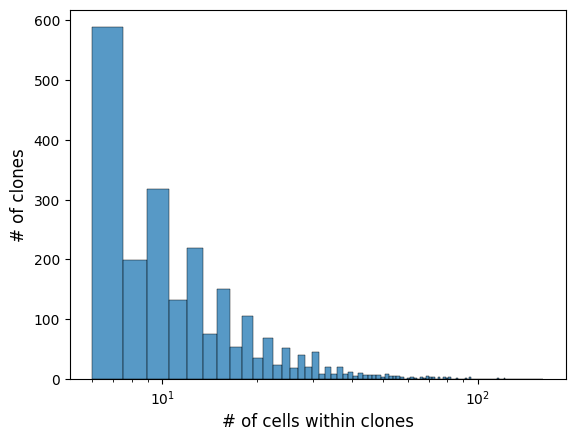

In [141]:
sns.histplot(mat.obs.n_counts.values)
# plt.yscale('log')
plt.xscale('log')
plt.xlabel('# of cells within clones', fontsize=12)
plt.ylabel('# of clones', fontsize=12)
plt.savefig('./cellnumber.png', dpi=300, bbox_inches='tight')

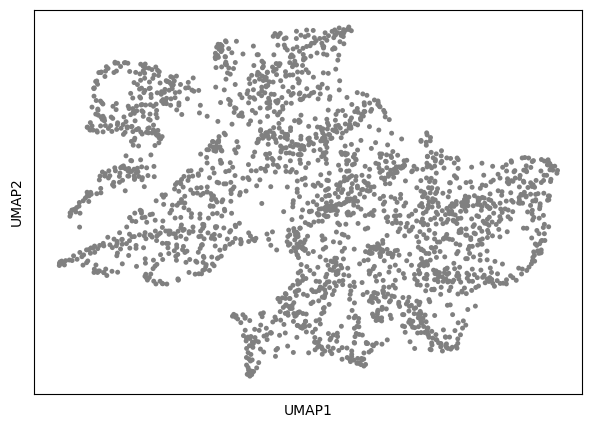

In [15]:
sc.tl.pca(mat)
sc.pp.neighbors(mat)
sc.tl.umap(mat)
sc.pl.scatter(mat, basis='umap')

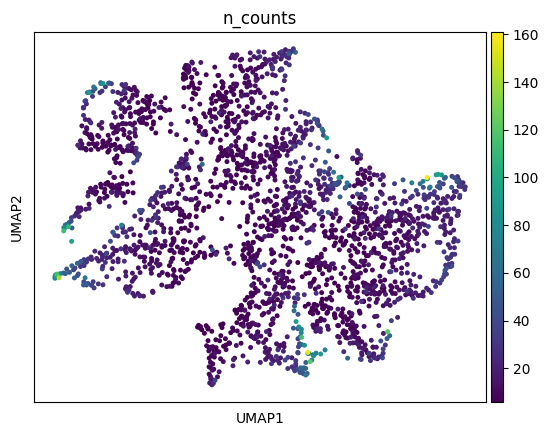

In [133]:
sc.pl.umap(mat, color='n_counts', legend_loc='on data')

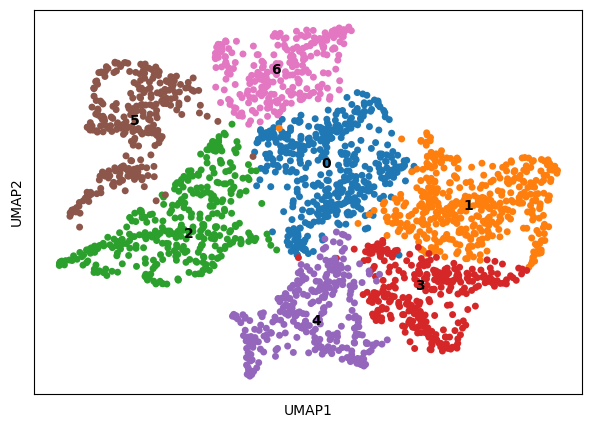

In [16]:
sc.tl.leiden(mat, resolution=0.3)
sc.pl.scatter(mat, basis='umap', color='leiden', legend_loc='on data', size=100, save='leiden.png', title='')

In [17]:
mat.obs.leiden.value_counts()

0    449
1    417
2    354
3    302
4    298
5    283
6    253
Name: leiden, dtype: int64

### UMAP related plots

In [18]:
mat.obs

n_counts leiden
clone_1         20.0      4
clone_2         15.0      4
clone_4          9.0      2
clone_8          6.0      2
clone_10        14.0      0
...              ...    ...
clone_5845      24.0      5
clone_5848      12.0      6
clone_5850      11.0      0
clone_5857      14.0      3
clone_5858       7.0      3

[2356 rows x 2 columns]

In [19]:
adata_clones_filter = adata_clones[[i in list(mat.obs.index) for i in adata_clones.obs['clone']], :]
adata_clones_filter

View of AnnData object with n_obs × n_vars = 37795 × 5000
    obs: 'Time_point', 'Population', 'Annotation', 'Well', 'time_cat', 'leiden', 'comb', 'label_man', 'clone', 'pop_time'
    var: 'symbol', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Annotation_colors', 'comb_colors', 'hvg', 'label_man_colors', 'label_man_sizes', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'paga', 'pca', 'time_cat_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

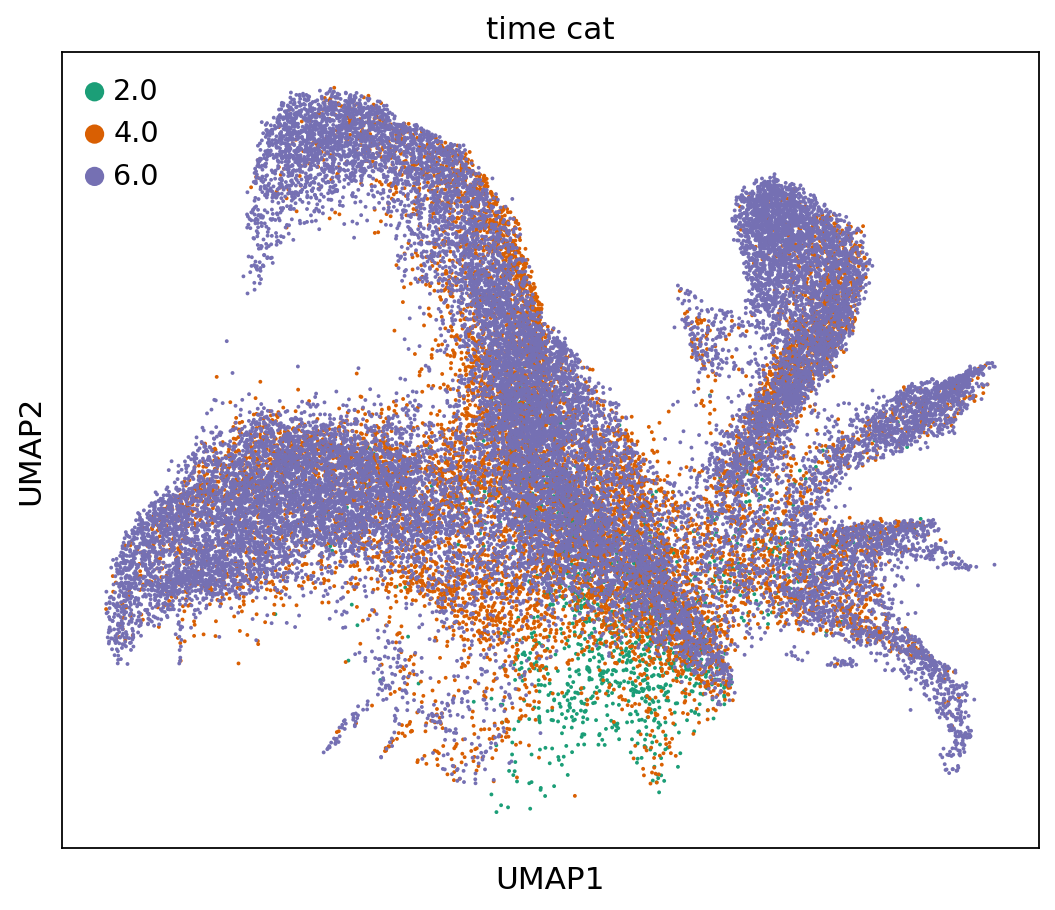

In [157]:
sc.set_figure_params(dpi_save=300, format='png', figsize=(7, 6))
sc.pl.scatter(adata_clones_filter, basis='umap', color='time_cat', legend_loc='upper left', palette=sns.color_palette('Dark2'), save='timepoints.png', size=12)

In [160]:
leiden = []
for clone in adata_clones_filter.obs['clone'].values:
    leiden.append(mat.obs.loc[clone.lower()]['leiden'])
adata_clones_filter.obs['mega-clones'] = leiden

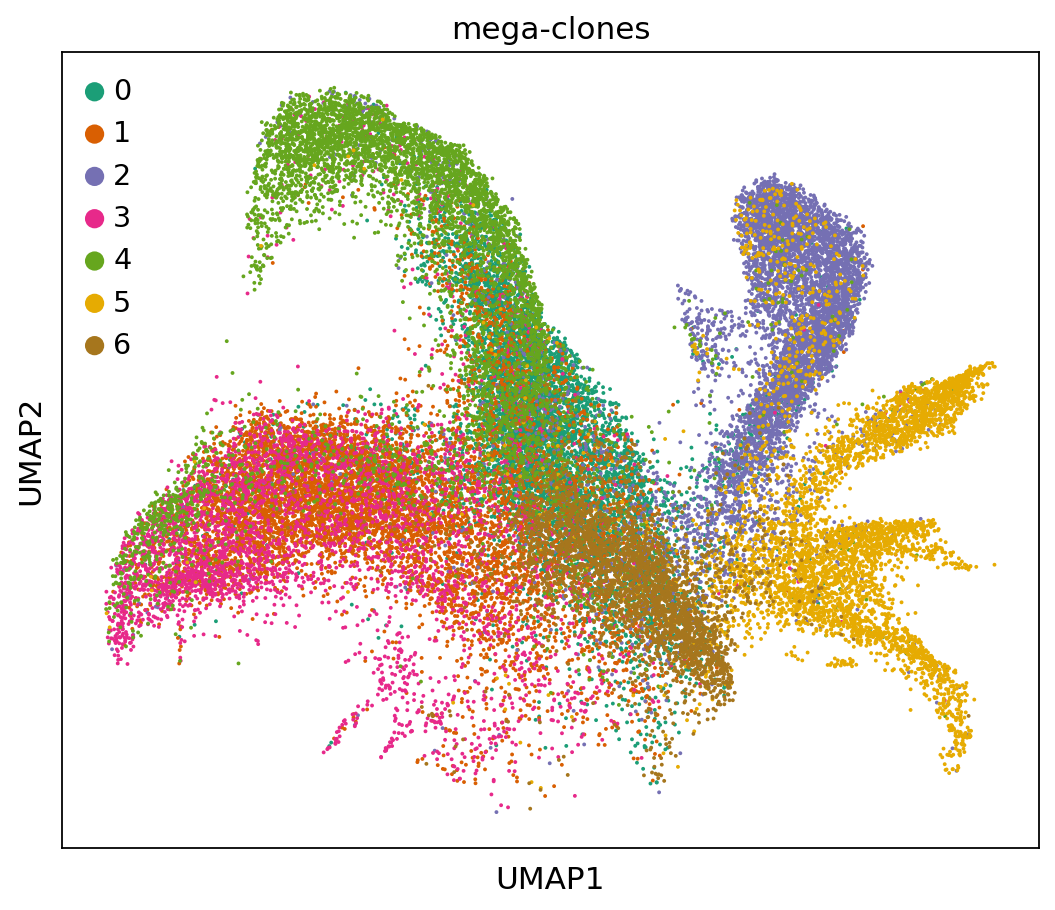

In [161]:
sc.set_figure_params(dpi_save=300, format='png', figsize=(7, 6))
sc.pl.scatter(adata_clones_filter, basis='umap', color='mega-clones', legend_loc='upper left', palette=sns.color_palette('Dark2'), save='megaclones.png', size=12)

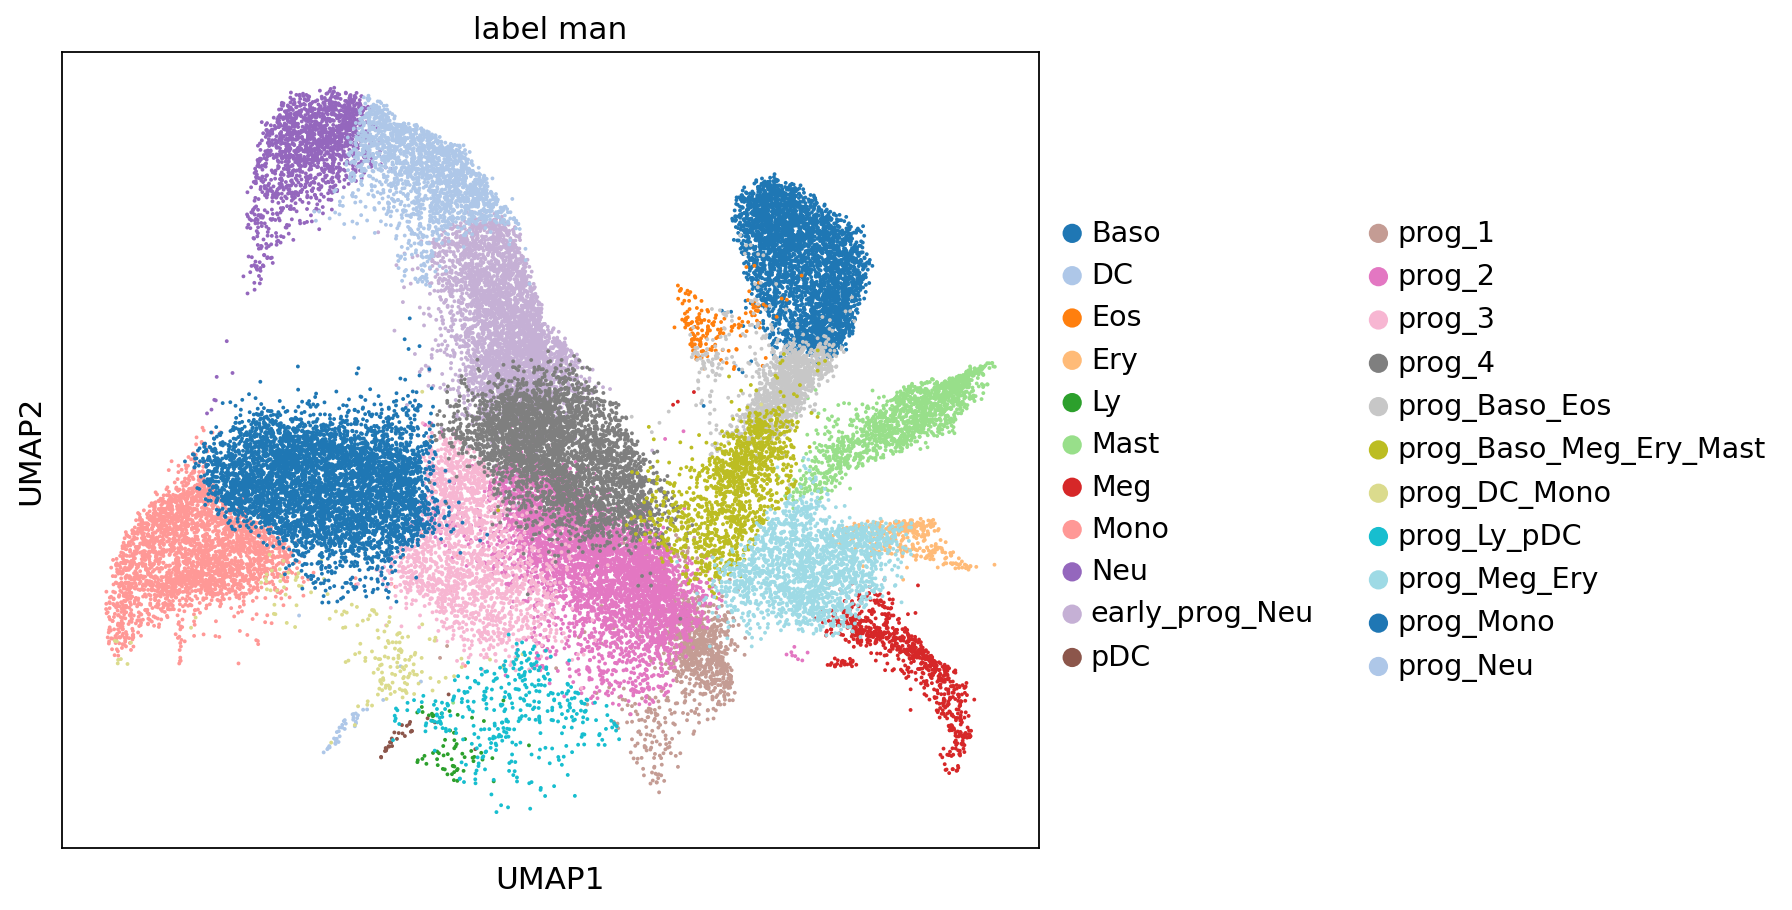

In [162]:
sc.set_figure_params(dpi_save=300, format='png', figsize=(7, 6))
sc.pl.scatter(adata_clones_filter, basis='umap', color='label_man', legend_loc='right margin', palette=sns.color_palette('tab20'), save='populations.png', size=12)

### Generate model inputs

In [178]:
times = [2, 4, 6]
size_leiden = len(set(mat.obs.leiden))
size_time = len(times)
size_pops = len(set(adata.obs.label_man))

In [179]:
from natsort import natsorted
leiden = list(set(mat.obs.leiden))
leiden.sort()

In [181]:
df = pd.DataFrame(data=mat.X, columns=list(mat.var.index), index=list(mat.obs.index))
df.loc[:, df.columns.str.endswith('_Day2')] = df.loc[:, df.columns.str.endswith('_Day2')] * 50000 / 4558
df.loc[:, df.columns.str.endswith('_Day4')] = df.loc[:, df.columns.str.endswith('_Day4')] * 111215 * (50000 / 22243) / 14679
df.loc[:, df.columns.str.endswith('_Day6')] = df.loc[:, df.columns.str.endswith('_Day6')] * 191313 * (111215 / 63771) * (50000 / 22243) / 28742
df = df.round(0)

In [183]:
df = sc.AnnData(df, dtype=np.float32)
df

AnnData object with n_obs × n_vars = 2356 × 59

In [184]:
kinetics = np.zeros((size_leiden + 1, size_time, size_pops), dtype=np.float32)
pops = list(set(adata_clones_filter.obs['label_man'].values))

for idi, leid in enumerate(leiden):
    for idj, time in enumerate(times):
        for idk, pop in enumerate(pops):
            if pop + '_Day' + str(time) in mat.var_names:
                kinetics[idi, idj, idk] = \
                    np.array(df[mat.obs.leiden == leid, mat.var_names == (pop + '_Day' + str(time))].X).sum()

In [185]:
kinetics.sum()

863396.0

In [190]:
for idj, time in enumerate(times):
    for idk, pop in enumerate(pops):
        if pop + '_Day' + str(time) in adata.obs['pop_time'].values:
            num = adata[adata.obs['pop_time'] == (pop + '_Day' + str(time)), :].shape[0]
            if str(time) == '2':
                num *= int(50000 / 4558)
            if str(time) == '4':
                num *= int(111215 * (50000 / 22243) / 14679)
            if str(time) == '5':
                num *= int(191313 * (111215 / 63771) * (50000 / 22243) / 28742)
            kinetics[-1, idj, idk] = num

In [191]:
kinetics.sum()

1999174.0

In [192]:
np.savetxt('./kinetics_array_correction_factor.txt', np.reshape(kinetics, (size_leiden + 1, size_time * size_pops)))

In [193]:
len(set(adata.obs['clone']))

5860

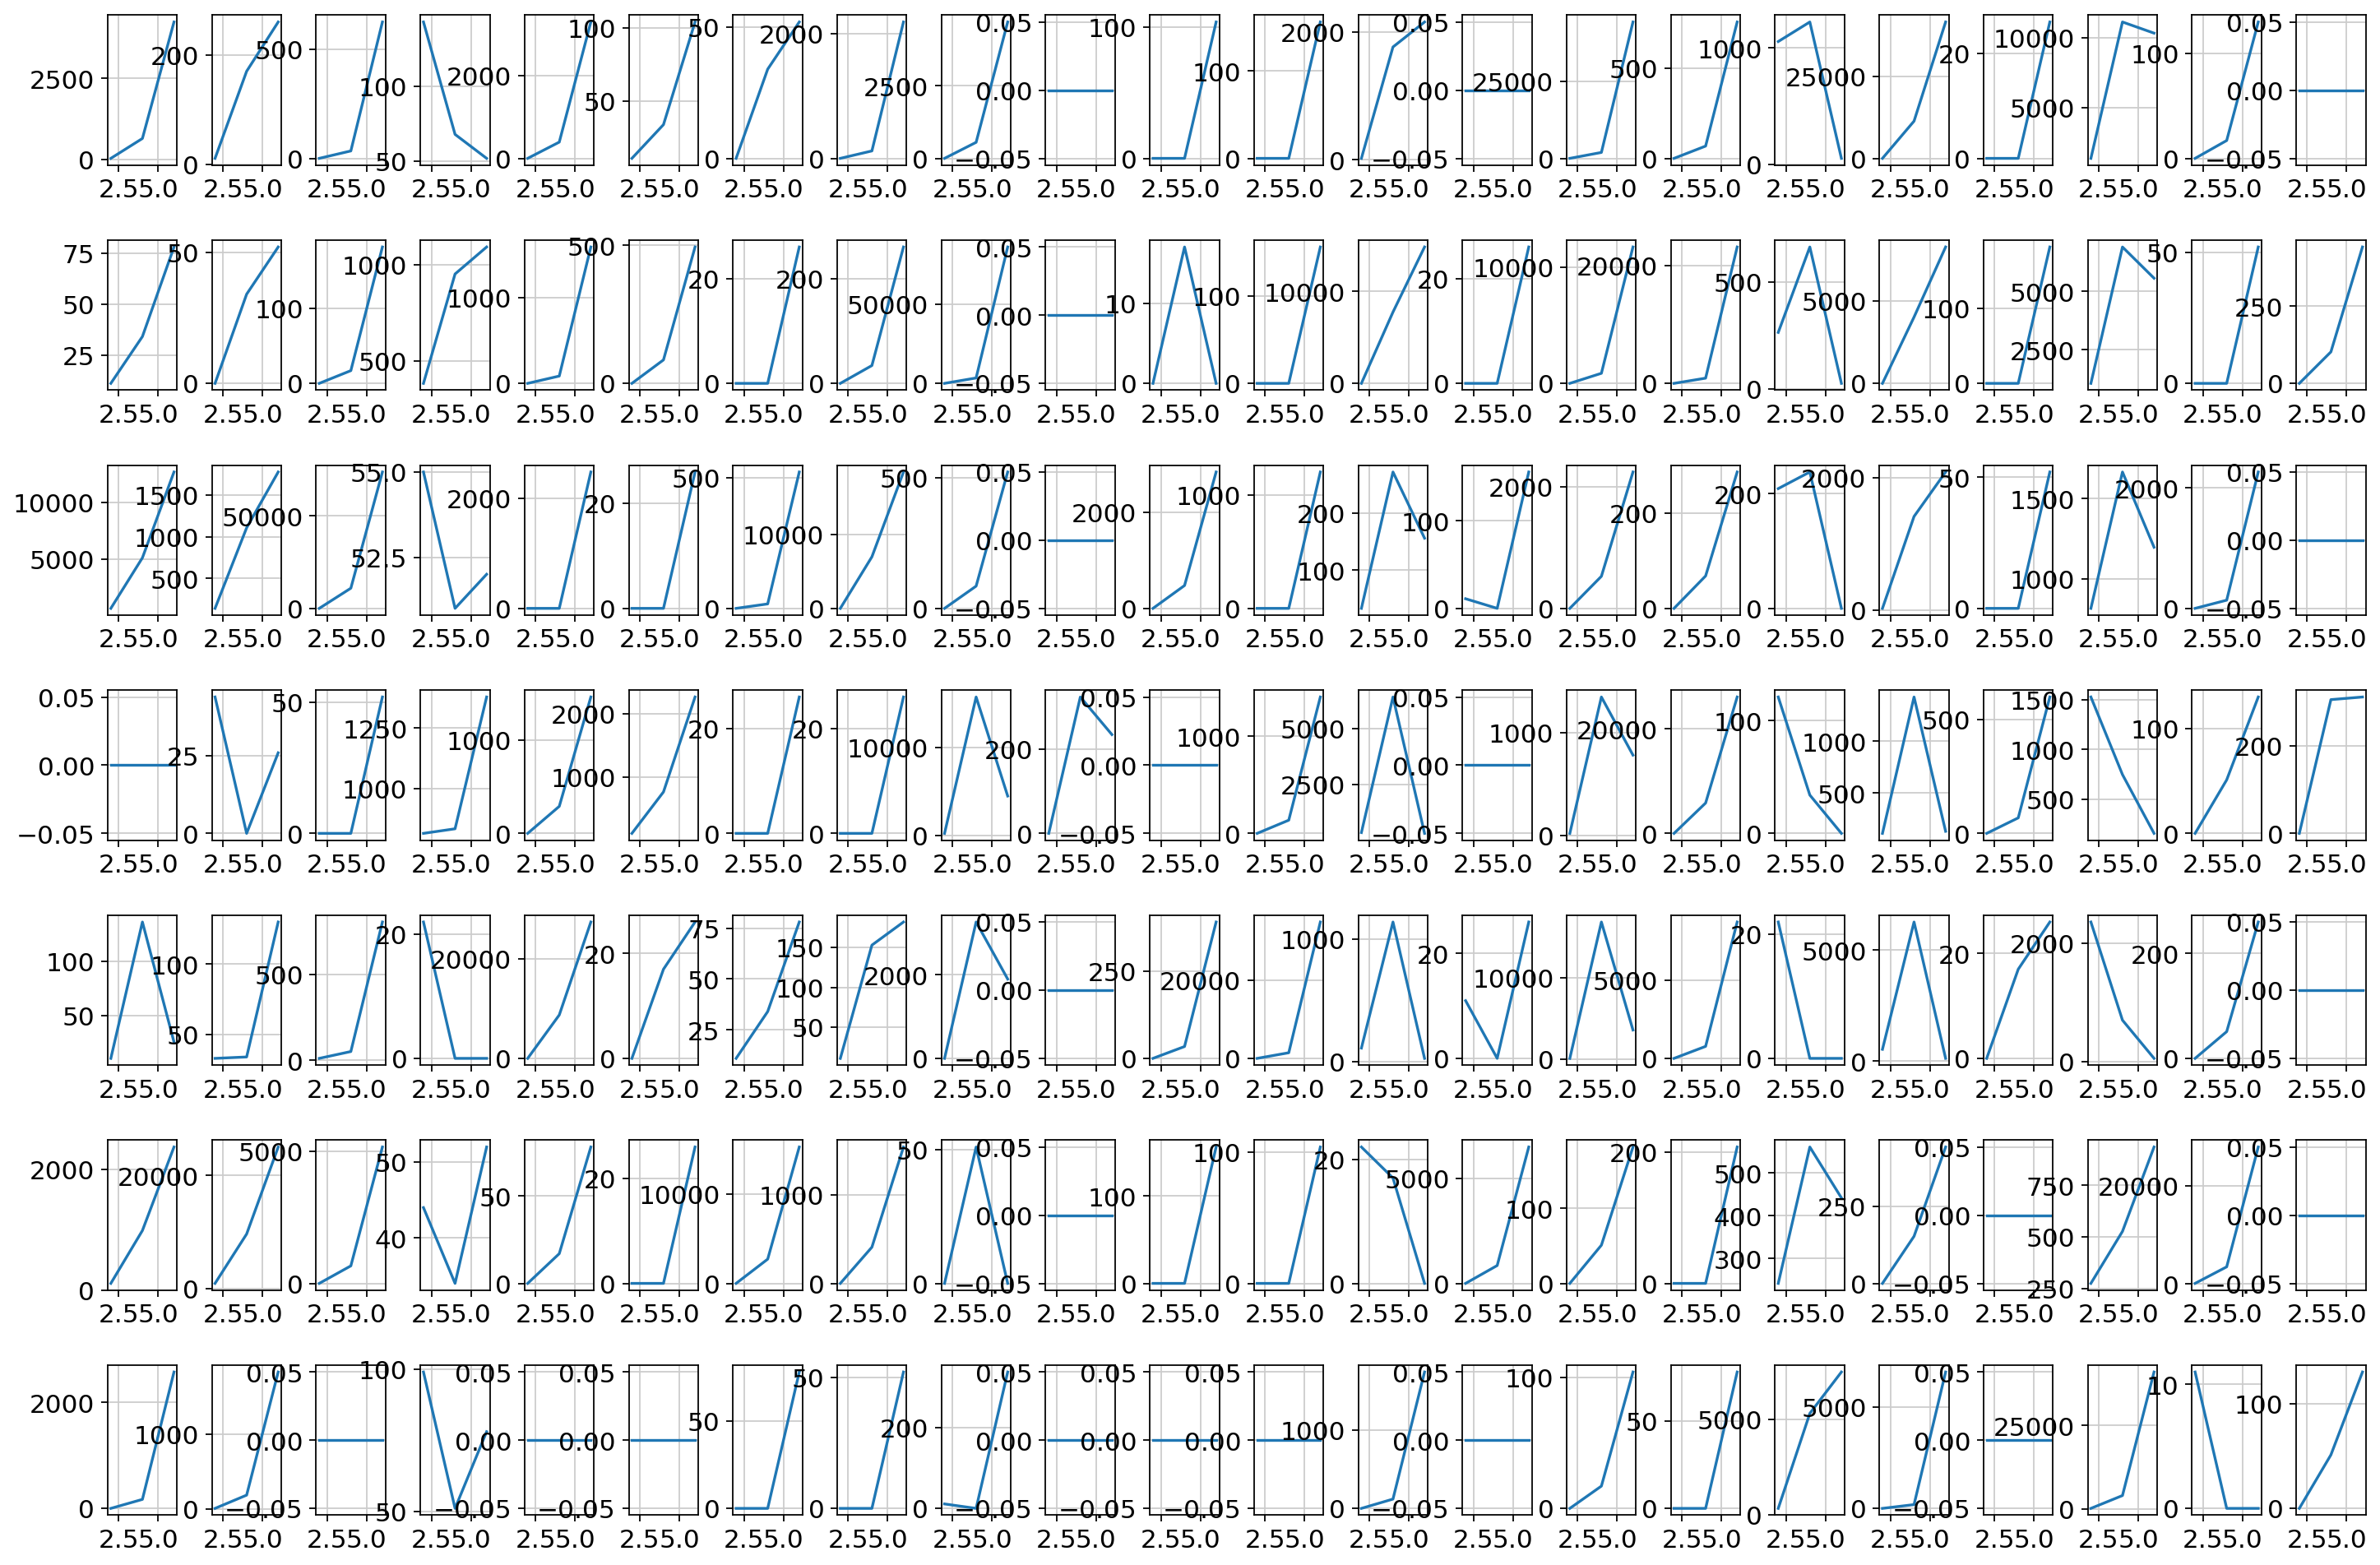

In [194]:
fig, ax = plt.subplots(size_leiden, size_pops, figsize=(22, 15))

for i in range(size_leiden):
    for j in range(size_pops):
        ax[i][j].plot([2, 4, 6], kinetics[i, :, j])

fig.subplots_adjust(hspace=0.5)
fig.subplots_adjust(wspace=0.5)

### Analysis of adata object

/data/users/mingzegao/.conda/envs/pytorch/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/data/users/mingzegao/.conda/envs/pytorch/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


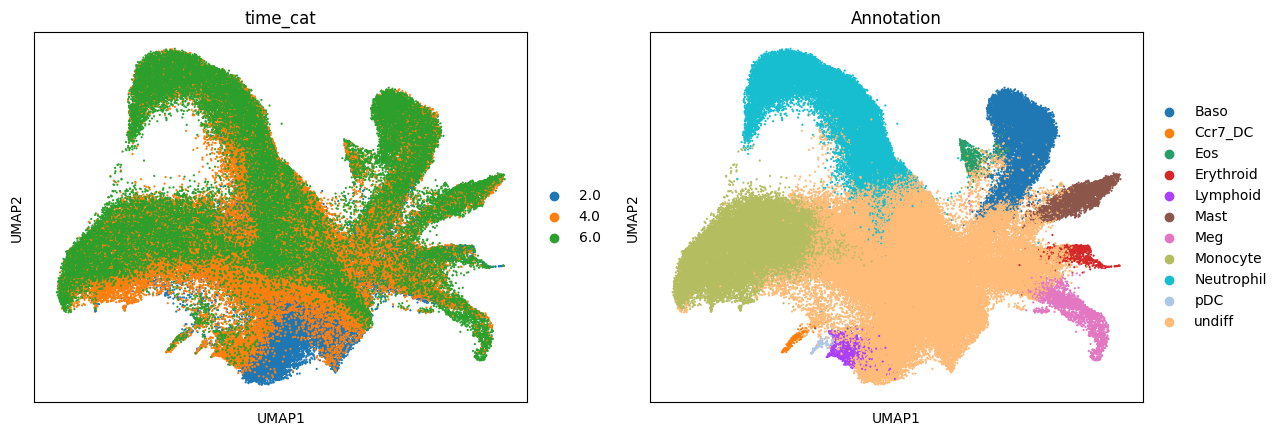

In [16]:
sc.pl.umap(adata, color=['time_cat', 'Annotation'], s=10)

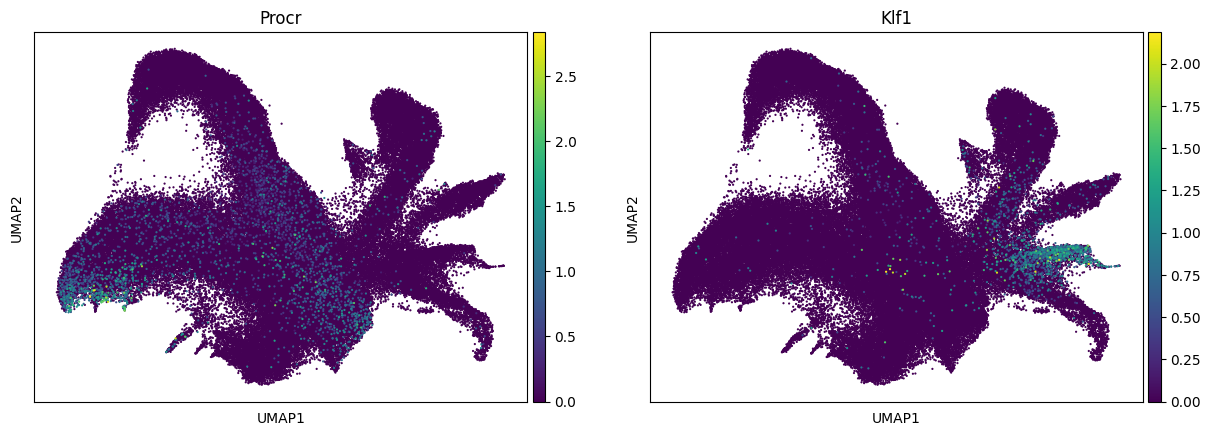

In [21]:
sc.pl.umap(adata, color=['Procr', 'Klf1'], s=10)

/data/users/mingzegao/.conda/envs/pytorch/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


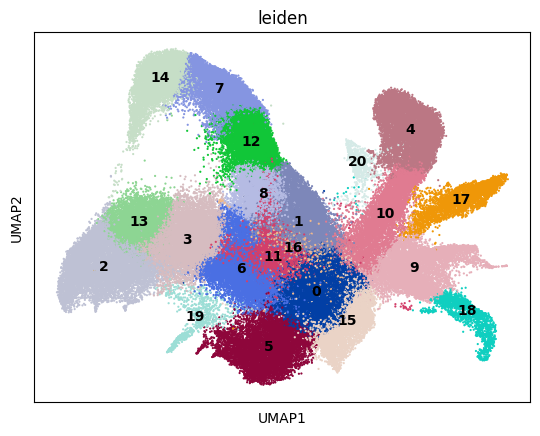

In [22]:
sc.pl.umap(adata, color=['leiden'], legend_loc='on data', s=10)

In [23]:
crosstab = pd.crosstab(adata.obs.leiden, adata.obs.Annotation)
crosstab

Annotation  Baso  Ccr7_DC  Eos  Erythroid  Lymphoid  Mast   Meg  Monocyte  \
leiden                                                                      
0              0        0    0          0         0     0     0         1   
1              0        0    0          0         0     0     0         2   
2              0        0    0          0         0     0     0      8481   
3              0        0    0          0         0     0     0      5819   
4           7607        0   74          0         0     0     0        12   
5              0        0    0          0       856     0     0         4   
6              0        0    0          0         0     0     0        75   
7              0        0    0          0         0     0     0         0   
8              0        0    0          0         0     0     0         0   
9              2        0    0        673         0     0   424         1   
10          2437        0    4          0         0     4     1         0   
11             1        0    0          2         0     0     0       176   
12             0        0    0          0         0     0     0         0   
13             0        0    0          0         0     0     0      4426   
14             0        0    0          0         0     0     0        32   
15             0        0    0          0         0     0     0         0   
16             2        0    0          1         0     0     0         3   
17            18        0    0          3         0  2570     1         4   
18             1        0    3          0         0     0  1661         1   
19             0      241    1          0         0     1     0         3   
20            57        0  471          1         0     3     1         1   

Annotation  Neutrophil  pDC  undiff  
leiden                               
0                    0    0   14687  
1                  667    0    8755  
2                    2    0     217  
3                   15    0    2499  
4                    7    0     245  
5                    0  100    6778  
6                    1    0    7215  
7                 6609    0       0  
8                 3038    0    3696  
9                    2    0    5534  
10                   1    0    3865  
11                 345    0    5740  
12                5935    0     141  
13                   4    0       0  
14                5366    0       0  
15                   0    0    4659  
16                   5    1    3207  
17                   1    0     523  
18                   7    0       0  
19                   2    0     588  
20                   6    0     236

/data/users/mingzegao/.conda/envs/pytorch/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: In a future version of pandas all arguments of Categorical.replace except for the argument 'value' will be keyword-only.
  values = values.replace(values.categories.difference(groups), np.nan)
/data/users/mingzegao/.conda/envs/pytorch/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)


/data/users/mingzegao/.conda/envs/pytorch/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


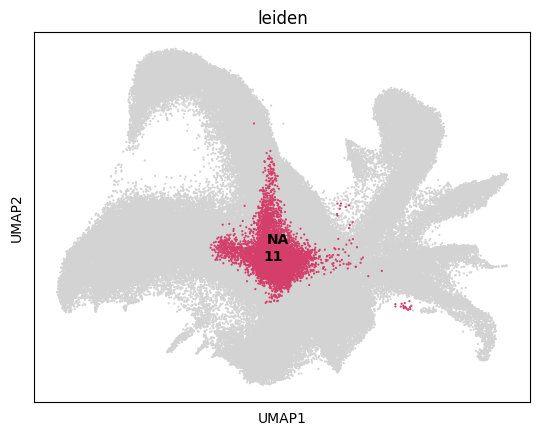

In [24]:
sc.pl.umap(adata, color=['leiden'], groups='11', legend_loc='on data', s=10)

In [25]:
adata.obs

Time_point Population  Annotation  Well time_cat leiden  \
0              6.0         LK      undiff     2      6.0     16   
1              6.0         LK      undiff     2      6.0     10   
2              6.0         LK    Monocyte     2      6.0      3   
3              6.0         LK  Neutrophil     2      6.0     12   
4              6.0         LK      undiff     2      6.0      9   
...            ...        ...         ...   ...      ...    ...   
130882         6.0        LSK      undiff     1      6.0     10   
130883         6.0        LSK      undiff     1      6.0      0   
130884         6.0        LSK    Monocyte     1      6.0      2   
130885         6.0        LSK    Monocyte     1      6.0      2   
130886         6.0        LSK      undiff     1      6.0     15   

                 comb               label_man  
0           undiff_16                  prog_2  
1           undiff_10  prog_Baso_Meg_Ery_Mast  
2          Monocyte_3               prog_Mono  
3       Neutrophil_12          early_prog_Neu  
4            undiff_9            prog_Meg_Ery  
...               ...                     ...  
130882      undiff_10  prog_Baso_Meg_Ery_Mast  
130883       undiff_0                  prog_2  
130884     Monocyte_2                    Mono  
130885     Monocyte_2                    Mono  
130886      undiff_15                  prog_1  

[126861 rows x 8 columns]

/data/users/mingzegao/.conda/envs/pytorch/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/data/users/mingzegao/.conda/envs/pytorch/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


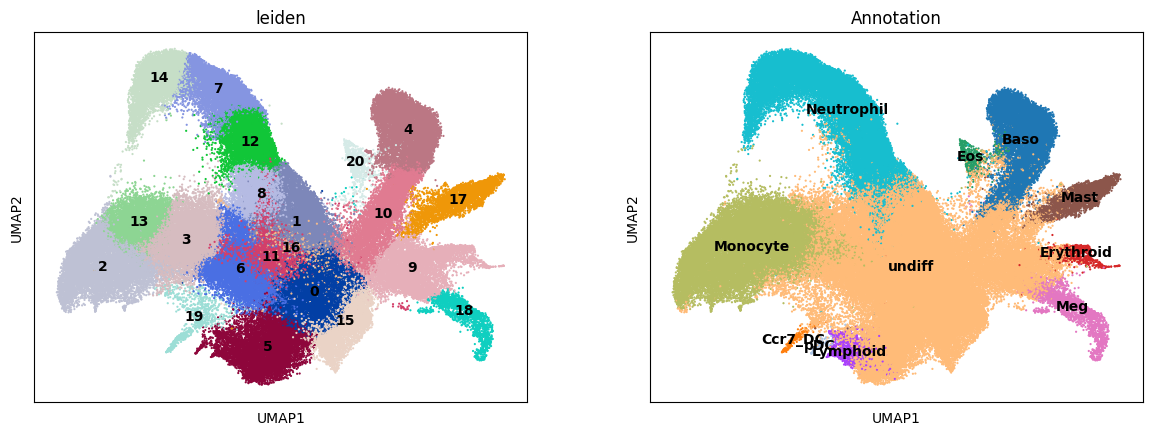

In [26]:
sc.pl.umap(adata, color=['leiden', 'Annotation'], legend_loc='on data', s=10)

In [28]:
np.unique(adata.obs['label_man'])

array(['Baso', 'DC', 'Eos', 'Ery', 'Ly', 'Mast', 'Meg', 'Mono', 'Neu',
       'early_prog_Neu', 'pDC', 'prog_1', 'prog_2', 'prog_3', 'prog_4',
       'prog_Baso_Eos', 'prog_Baso_Meg_Ery_Mast', 'prog_DC_Mono',
       'prog_Ly_pDC', 'prog_Meg_Ery', 'prog_Mono', 'prog_Neu'],
      dtype=object)

In [31]:
df_3 = pd.DataFrame(adata.obs['comb'].value_counts())
df_3.iloc[40:,:]

comb
Monocyte_14      32
Baso_17          18
Neutrophil_3     15
Monocyte_4       12
Neutrophil_4      7
Neutrophil_18     7
Neutrophil_20     6
Neutrophil_16     5
Mast_10           4
Monocyte_5        4
Monocyte_17       4
Eos_10            4
Neutrophil_13     4
Mast_20           3
Monocyte_16       3
Eos_18            3
Erythroid_17      3
Monocyte_19       3
Baso_16           2
Erythroid_11      2
Neutrophil_9      2
Neutrophil_2      2
Neutrophil_19     2
Monocyte_1        2
Baso_9            2
Mast_19           1
Erythroid_16      1
Baso_18           1
Meg_10            1
Meg_17            1
Meg_20            1
Monocyte_0        1
Monocyte_9        1
Neutrophil_17     1
Baso_11           1
Neutrophil_10     1
Eos_19            1
Monocyte_20       1
pDC_16            1
Erythroid_20      1
Neutrophil_6      1
Monocyte_18       1

/data/users/mingzegao/.conda/envs/pytorch/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: In a future version of pandas all arguments of Categorical.replace except for the argument 'value' will be keyword-only.
  values = values.replace(values.categories.difference(groups), np.nan)
/data/users/mingzegao/.conda/envs/pytorch/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)
/data/users/mingzegao/.conda/envs/pytorch/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


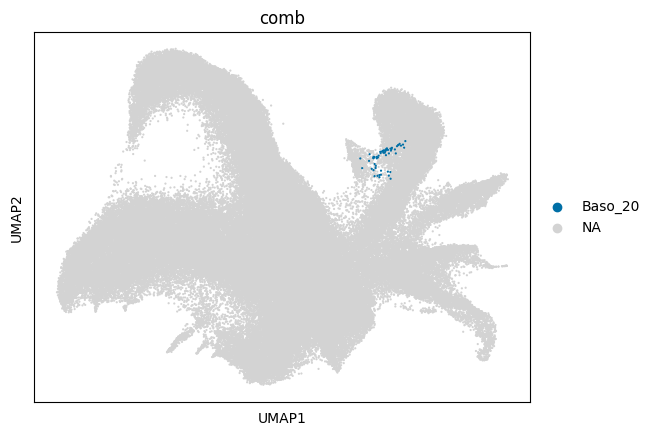

In [34]:
sc.pl.umap(adata, color=['comb'], groups='Baso_20', s=10)

In [35]:
df_3.loc[df_3.index.str.startswith('Mono')]

comb
Monocyte_2   8481
Monocyte_3   5819
Monocyte_13  4426
Monocyte_11   176
Monocyte_6     75
Monocyte_14    32
Monocyte_4     12
Monocyte_5      4
Monocyte_17     4
Monocyte_16     3
Monocyte_19     3
Monocyte_1      2
Monocyte_0      1
Monocyte_9      1
Monocyte_20     1
Monocyte_18     1

In [36]:
df_3.loc[df_3.index.str.endswith('_20')]

comb
Eos_20          471
undiff_20       236
Baso_20          57
Neutrophil_20     6
Mast_20           3
Meg_20            1
Monocyte_20       1
Erythroid_20      1

In [37]:
adata.obs

Time_point Population  Annotation  Well time_cat leiden  \
0              6.0         LK      undiff     2      6.0     16   
1              6.0         LK      undiff     2      6.0     10   
2              6.0         LK    Monocyte     2      6.0      3   
3              6.0         LK  Neutrophil     2      6.0     12   
4              6.0         LK      undiff     2      6.0      9   
...            ...        ...         ...   ...      ...    ...   
130882         6.0        LSK      undiff     1      6.0     10   
130883         6.0        LSK      undiff     1      6.0      0   
130884         6.0        LSK    Monocyte     1      6.0      2   
130885         6.0        LSK    Monocyte     1      6.0      2   
130886         6.0        LSK      undiff     1      6.0     15   

                 comb               label_man  
0           undiff_16                  prog_2  
1           undiff_10  prog_Baso_Meg_Ery_Mast  
2          Monocyte_3               prog_Mono  
3       Neutrophil_12          early_prog_Neu  
4            undiff_9            prog_Meg_Ery  
...               ...                     ...  
130882      undiff_10  prog_Baso_Meg_Ery_Mast  
130883       undiff_0                  prog_2  
130884     Monocyte_2                    Mono  
130885     Monocyte_2                    Mono  
130886      undiff_15                  prog_1  

[126861 rows x 8 columns]

/data/users/mingzegao/.conda/envs/pytorch/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


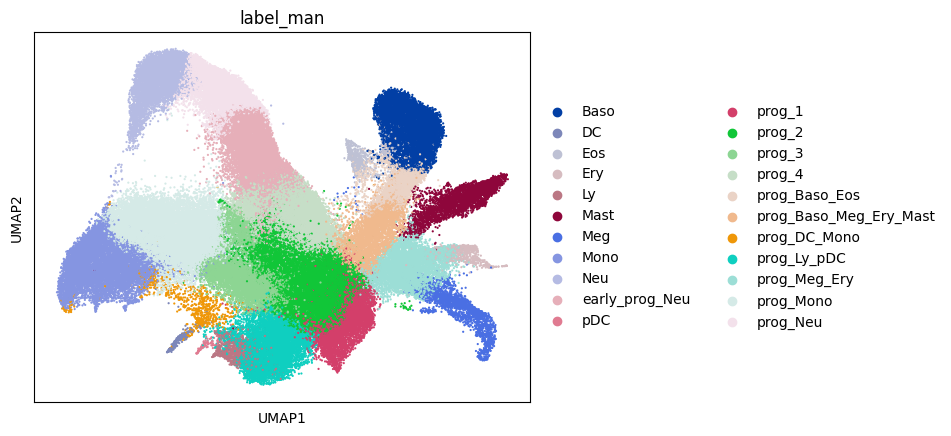

In [38]:
sc.pl.umap(adata, color=['label_man'], s=10)

In [39]:
pd.DataFrame(adata.obs['label_man'].value_counts())

label_man
prog_2                      23650
prog_Mono                   12939
prog_4                      12453
early_prog_Neu              10126
Mono                         8558
Baso                         7626
prog_3                       7216
prog_Ly_pDC                  6782
prog_Neu                     6609
prog_Meg_Ery                 5539
Neu                          5398
prog_1                       4659
prog_Baso_Meg_Ery_Mast       3865
Mast                         3120
prog_Baso_Eos                2928
Meg                          2097
Ly                            856
prog_DC_Mono                  805
Ery                           673
Eos                           614
DC                            248
pDC                           100

/data/users/mingzegao/.conda/envs/pytorch/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: In a future version of pandas all arguments of Categorical.replace except for the argument 'value' will be keyword-only.
  values = values.replace(values.categories.difference(groups), np.nan)
/data/users/mingzegao/.conda/envs/pytorch/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)
/data/users/mingzegao/.conda/envs/pytorch/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


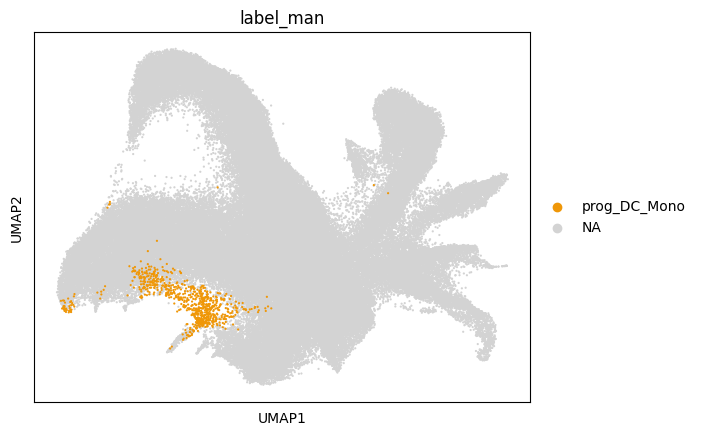

In [40]:
sc.pl.umap(adata, color=['label_man'], groups='prog_DC_Mono', s=10)

/data/users/mingzegao/.conda/envs/pytorch/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


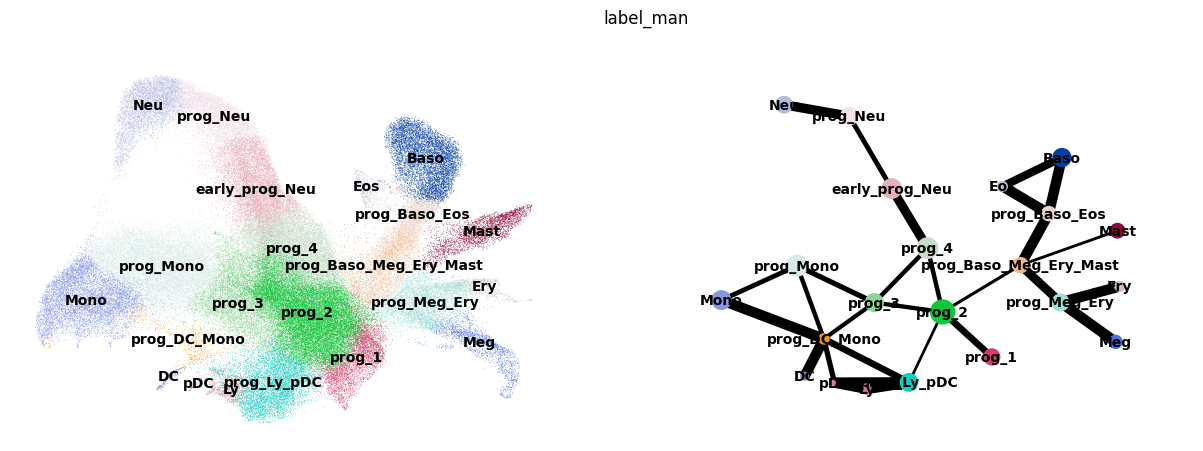

In [42]:
sc.tl.paga(adata, groups='label_man')
sc.pl.paga_compare(adata, threshold = 0.25)

In [43]:
adata

AnnData object with n_obs × n_vars = 126861 × 5000
    obs: 'Time_point', 'Population', 'Annotation', 'Well', 'time_cat', 'leiden', 'comb', 'label_man'
    var: 'symbol', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Annotation_colors', 'comb_colors', 'hvg', 'label_man_colors', 'label_man_sizes', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'paga', 'pca', 'time_cat_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [50]:
paga = pd.read_excel('./mingze_weinreb.xlsx', index_col=0)
paga = paga.fillna(0.0)
paga.to_csv('./graph_table.csv')

<AxesSubplot: >

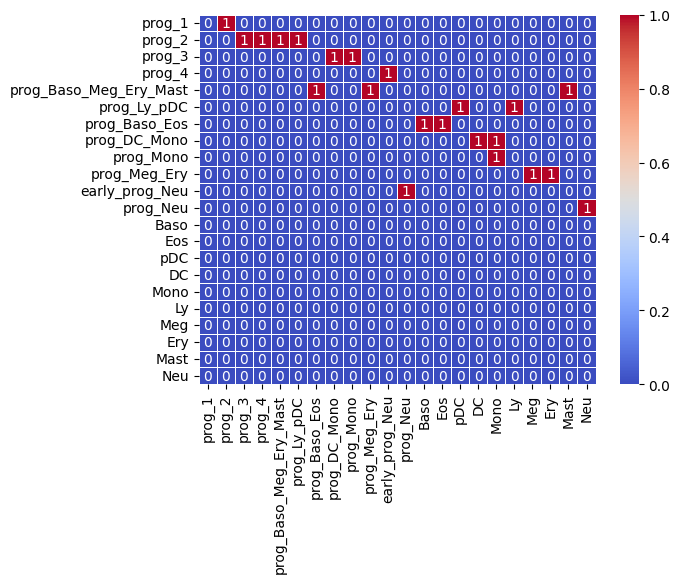

In [52]:
import seaborn as sns
sns.heatmap(paga, annot=True, linewidth=.5, cmap='coolwarm')

In [59]:
anno = pd.DataFrame(columns=['populations'], index=['Clone ' + str(i) for i in range(paga.shape[0])])
anno['populations'] = paga.columns
anno.to_csv('./annotations.csv', index_label='clones')

### Filtered adata

In [21]:
leiden = []
for clone in adata_clones_filter.obs['clone'].values:
    leiden.append(mat.obs.loc[clone.lower()]['leiden'])
adata_clones_filter.obs['mega-clones'] = leiden

In [22]:
adata_clones_filter.obs

Time_point Population  Annotation  Well time_cat leiden          comb  \
0              6.0         LK      undiff     2      6.0     16     undiff_16   
1              6.0         LK      undiff     2      6.0     10     undiff_10   
2              6.0         LK    Monocyte     2      6.0      3    Monocyte_3   
4              6.0         LK      undiff     2      6.0      9      undiff_9   
6              6.0         LK  Neutrophil     2      6.0      7  Neutrophil_7   
...            ...        ...         ...   ...      ...    ...           ...   
130872         6.0        LSK      undiff     1      6.0      1      undiff_1   
130874         6.0        LSK      undiff     1      6.0     16     undiff_16   
130876         6.0        LSK      undiff     1      6.0      0      undiff_0   
130877         6.0        LSK  Neutrophil     1      6.0      1  Neutrophil_1   
130879         6.0        LSK    Monocyte     1      6.0     13   Monocyte_13   

                     label_man       clone                     pop_time  \
0                       prog_2   clone_573                  prog_2_Day6   
1       prog_Baso_Meg_Ery_Mast  clone_1440  prog_Baso_Meg_Ery_Mast_Day6   
2                    prog_Mono   clone_394               prog_Mono_Day6   
4                 prog_Meg_Ery  clone_1972            prog_Meg_Ery_Day6   
6                     prog_Neu  clone_1450                prog_Neu_Day6   
...                        ...         ...                          ...   
130872                  prog_4  clone_2469                  prog_4_Day6   
130874                  prog_2  clone_4999                  prog_2_Day6   
130876                  prog_2   clone_267                  prog_2_Day6   
130877          early_prog_Neu  clone_3534          early_prog_Neu_Day6   
130879               prog_Mono  clone_4945               prog_Mono_Day6   

       mega-clones  
0                6  
1                6  
2                1  
4                5  
6                4  
...            ...  
130872           0  
130874           0  
130876           6  
130877           0  
130879           1  

[37795 rows x 11 columns]

In [23]:
adata.obs['mega-clones'] = np.zeros(adata.shape[0]) - 1
for i in list(adata_clones_filter.obs.index):
    adata.obs.at[i, 'mega-clones'] = adata_clones_filter.obs.loc[i]['mega-clones']
adata.obs['mega-clones'] = [str(i) for i in adata.obs['mega-clones']]

In [24]:
adata.write('./adata_megas.h5ad')